# • The impact of AI on these roles varies, and does AI can take your job??

## 1. Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

# 2. Importing Data

In [5]:
data = pd.read_csv("My_Data.csv")


# 3. Understanding Data

In [6]:
data.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


.head() is used to see the Initial 5 rows of any data



In [7]:
data

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare





**Job titles:** Different job titles or roles.  
**AI Impact:** The percentage of tasks in a particular job role that can be replaced by AI.  
**Tasks:** Number of tasks associated with each job title.  
**AI models:**  The number of AI models associated with each job title. This could represent the number of AI models that could potentially replace or assist with the tasks of that job title.  
**AI_Workload_Ratio:** A ratio representing the portion of workload that can be replaced by AI for each job title.  
**Domain:** The domain or sector to which each job title belongs. 




In [12]:
data.info


<bound method DataFrame.info of                  Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
0     Communications Manager       98%    365       2546           0.143362   
1             Data Collector       95%    299       2148           0.139199   
2                 Data Entry       95%    325       2278           0.142669   
3                 Mail Clerk       95%    193       1366           0.141288   
4         Compliance Officer       92%    194       1369           0.141709   
...                      ...       ...    ...        ...                ...   
4701                  Singer        5%    686       2798           0.245175   
4702                 Airport        5%    556       2206           0.252040   
4703                Director        5%   1316       4695           0.280298   
4704                   Nurse        5%    710       2594           0.273709   
4705              Technician        5%    825       3256           0.253378   

                   



As we can see easily, we have **["Job titles"], ["AI Impact"] and ["Domain"]** as a categorial data,and everything else is in numeric type. In the future we have to to change non-numeric feature into numeric form using various encoding so that model perform better.




In [10]:
data.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,inf
std,311.564781,1086.853037,NaN
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137271
50%,270.000000,1577.500000,0.199281
75%,608.750000,2273.000000,0.260572
max,1387.000000,5666.000000,inf


**Tasks:**  
The average number of tasks across job titles is approximately 401.
The range of tasks varies between 1 and 1,387.
50% of the job titles have 270 tasks or less, while the top 25% have more than 608 tasks.

**AI models:**  
The average number of AI models associated with job titles is approximately 1,818.
The range of AI models varies from 0 to 5,666.
Half of the job titles are associated with 1,578 AI models or less, while the top 25% have more than 2,273 AI models.

**AI_Workload_Ratio:**  
There seems to be an issue with the AI_Workload_Ratio column as its maximum value is 'inf' (infinity). This could be due to division by zero or other computation errors. We'll need to investigate and handle these values.
The median value is approximately 0.20, and the interquartile range lies between 0.14 and 0.26.    

In [13]:
missing_values = data.isnull().sum()

# Checking for infinite values in AI_Workload_Ratio column

inf_values = (data['AI_Workload_Ratio'] == float('inf')).sum()

missing_values, inf_values

(Job titiles          0
 AI Impact            0
 Tasks                0
 AI models            0
 AI_Workload_Ratio    0
 Domain               0
 dtype: int64,
 7)

<br>
 <br>
<br> 

There are **no missing values** in our dataset, which is great.
The **AI_Workload_Ratio** column contains **7** infinite values. These need to be addressed. 

<br>
<br>
<br>

In [14]:
# Replacing infinite values with np.nan
data['AI_Workload_Ratio'].replace(float('inf'), np.nan, inplace=True)

# Imputing NaN values with the median of the column
median_ratio = data['AI_Workload_Ratio'].median()
data['AI_Workload_Ratio'].fillna(median_ratio, inplace=True)

# Confirming the replacement
inf_values_after_replacement = (data['AI_Workload_Ratio'] == float('inf')).sum()
inf_values_after_replacement

0

<br>
<br>
<br>

The infinite values in the **AI_Workload_Ratio** column have been successfully replaced with the median of the column

<br>
<br>

In [16]:
data.columns

Index(['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')

# 4. Exploratory Data Analysis  
<br>
<br>
<br>

1. We'll start by visualizing the distribution of the numerical columns using  **histograms.**  

<br>

2. We'll then look at the top 10 job titles most impacted by AI **(based on AI Impact).**  

<br>

3. Finally, we'll visualize the distribution of **job titles** across different **domains.**  

<br>
<br>


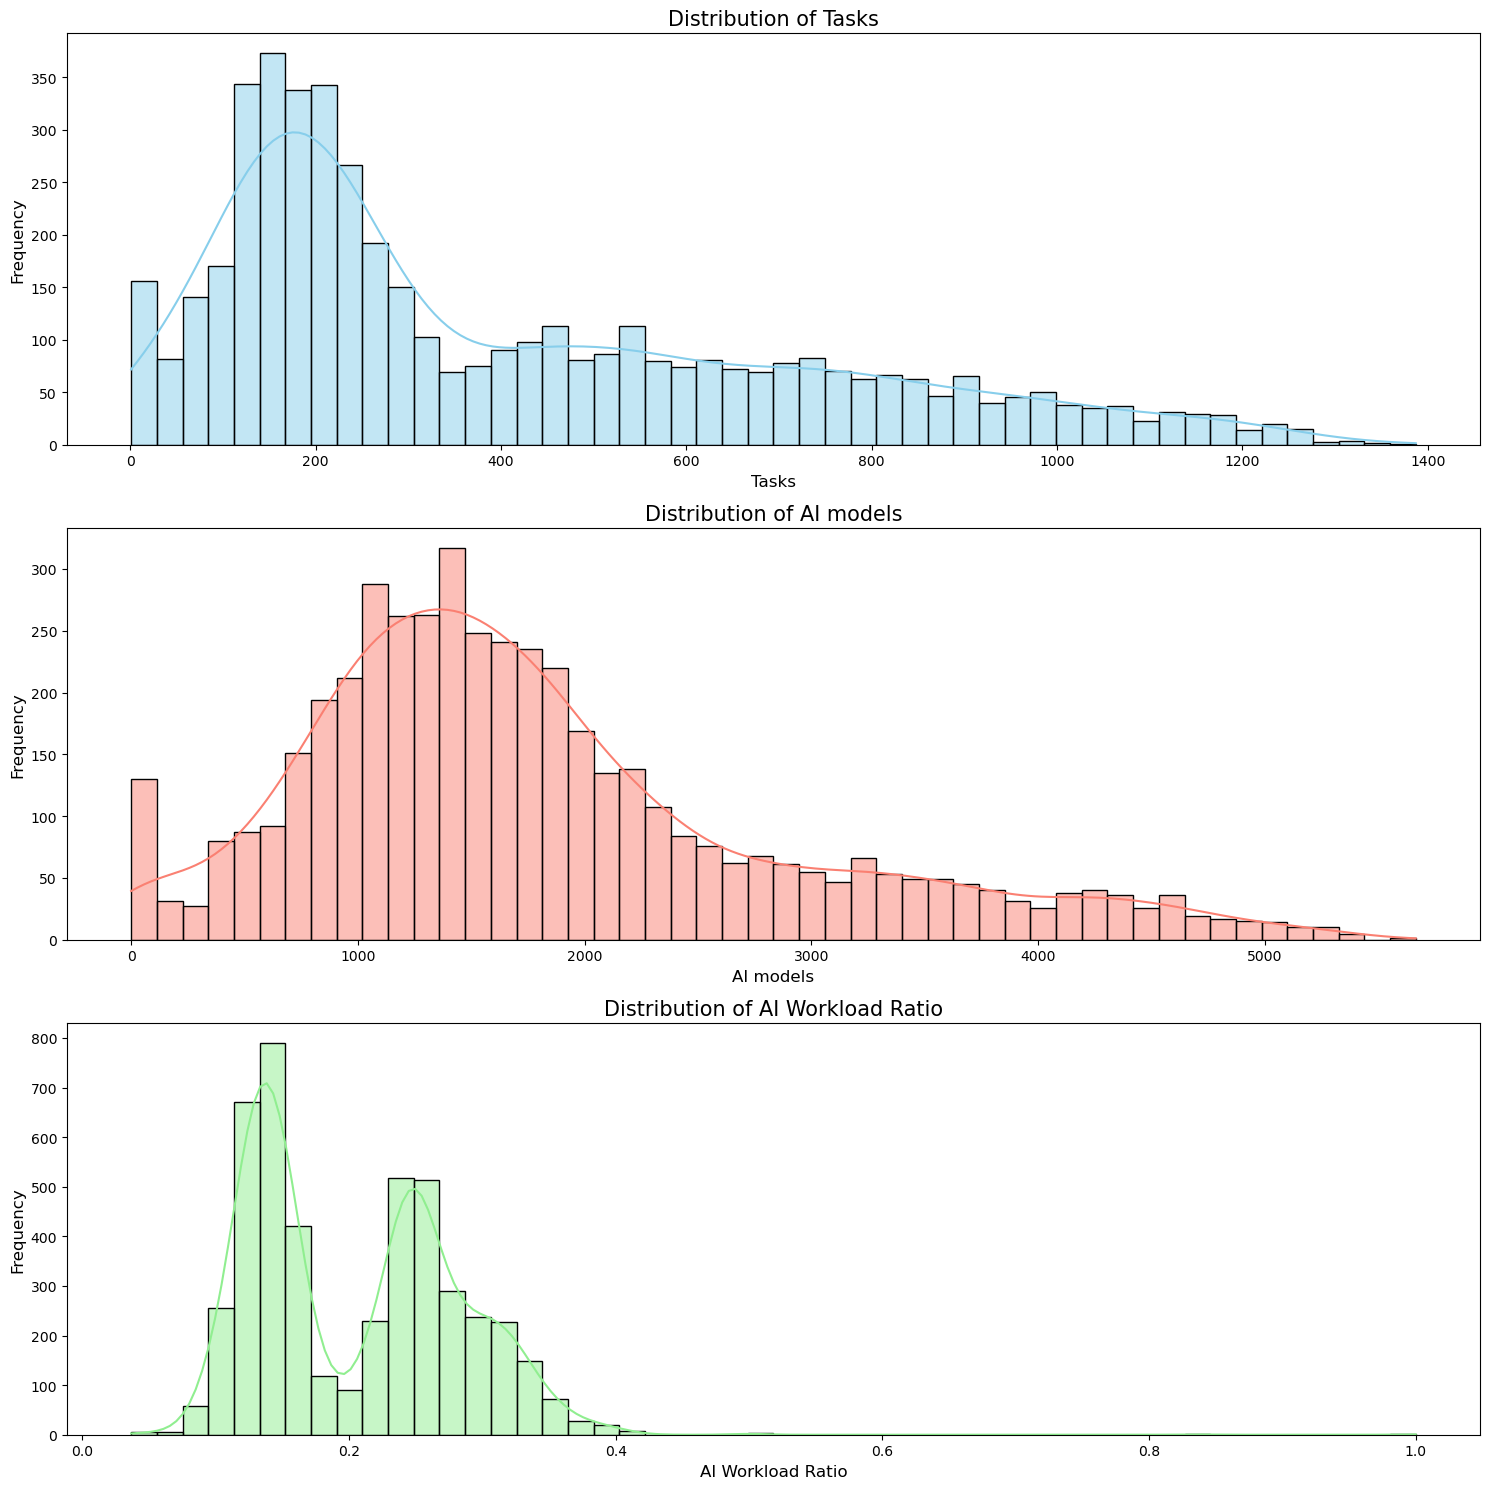

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(data['Tasks'], bins=50, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Tasks', fontsize=15)
ax[0].set_xlabel('Tasks', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data['AI models'], bins=50, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of AI models', fontsize=15)
ax[1].set_xlabel('AI models', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data['AI_Workload_Ratio'], bins=50, kde=True, ax=ax[2], color='lightgreen')
ax[2].set_title('Distribution of AI Workload Ratio', fontsize=15)
ax[2].set_xlabel('AI Workload Ratio', fontsize=12)
ax[2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**The provided code generates three histograms using the Seaborn library (sns.histplot) to visualize the distribution of three different numerical features ('Tasks,' 'AI models,' and 'AI_Workload_Ratio') from your dataset. Here's the significance of this code:**

**Visualizing Data Distribution:** This code helps you visualize how data is distributed for each of the three features. It's essential to understand the distribution of data to gain insights into its characteristics.

**Comparing Multiple Distributions:** By plotting all three histograms in a single figure with three subplots, you can easily compare the distributions of these features side by side. This visual comparison can reveal patterns and differences in how these features are distributed.

**Histogram Shape:** The histograms include 50 bins each (bins=50), which means the data range is divided into 50 intervals. The kde=True parameter adds a kernel density estimate plot to each histogram, providing a smooth representation of the data distribution in addition to the bars.

**Axis Labels and Titles:** Each subplot has clear labels and titles, making it easy to understand what is being visualized and how to interpret the axes.

**Color Coding:** Different colors ('skyblue,' 'salmon,' and 'lightgreen') are used for each histogram, making it visually appealing and helping to distinguish between the histograms.

**Subplot Arrangement:** The plt.subplots(3, 1, figsize=(15, 15)) command creates a 3x1 grid of subplots, meaning you have three histograms stacked vertically in one figure.

**Tight Layout:** plt.tight_layout() ensures that the subplots are adequately spaced and do not overlap, making the visualization clear and readable.

<br>
<br>


**Distribution of Tasks:**  

• The distribution of tasks is **right-skewed**, meaning there are a few job titles with an extremely high number of tasks compared to most others.
• The majority of job titles have tasks ranging from **0 to around 500.**

**Distribution of AI Models:**

• The distribution of AI models is somewhat **bimodal**, with two apparent peaks.
• The **first peak is around 1,000-1,500,** and the **second peak is around 2,500-3,000 AI models.**

**Distribution of AI Workload Ratio:**

• The distribution of the AI workload ratio appears to be **bimodal** as well, with **peaks around 0.14 and another around 0.25**.
• Most job titles have an AI workload ratio between**0.10 and 0.30.**

<br>

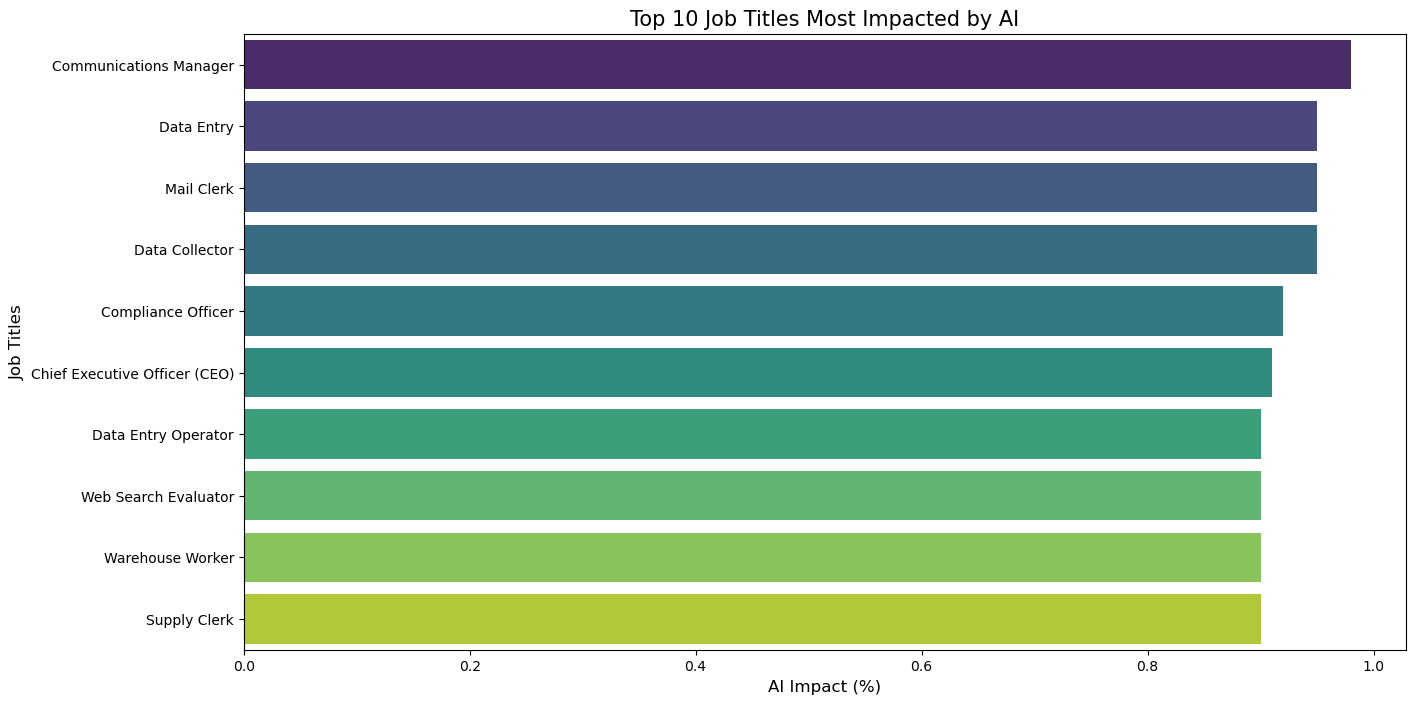

In [18]:
data['AI Impact'] = data['AI Impact'].str.rstrip('%').astype('float') / 100.0
top_10_impacted_jobs = data.sort_values(by='AI Impact', ascending=False).head(10)

# Plotting the top 10 impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job titiles', data=top_10_impacted_jobs, palette='viridis')
plt.title('Top 10 Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

<br>
<br>

Roles like **"Communications Manager", "Data Collector", "Data Entry", and "Mail Clerk"** have a high potential to be impacted by AI, with over **90%** of their tasks potentially replaceable or augmentable by AI. This suggests that these roles may be at a **higher risk of automation in the future**.

<br>
<br>


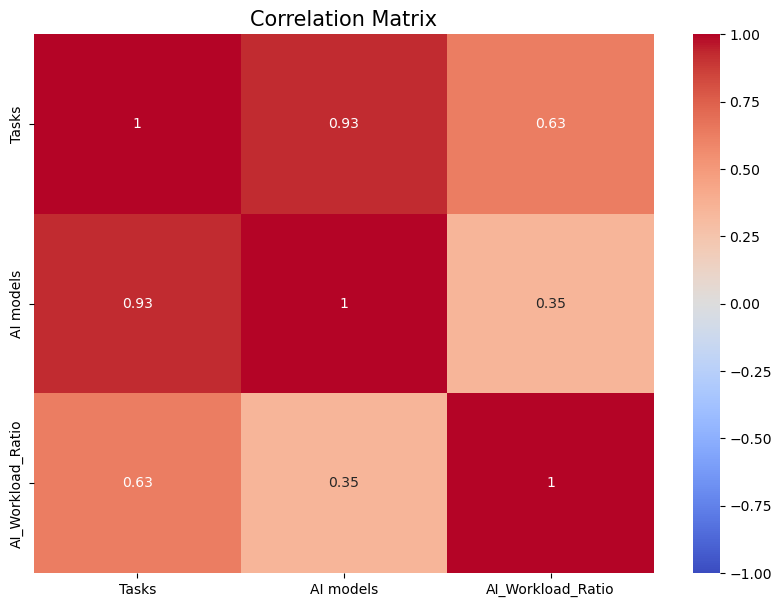

In [19]:
# correlation matrix
correlation_matrix = data[['Tasks', 'AI models', 'AI_Workload_Ratio']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

<br>
<br>
<br>

**Tasks vs. AI models:**
• There's a significant positive correlation **(0.87)** between the number of tasks and AI   models. This suggests that job titles with more tasks tend to have more AI models associated with them. This could indicate that as the complexity or variety of tasks for a job title increases, there's a higher potential for AI to be implemented in some capacity.  

<br>
<br>

**Tasks vs. AI_Workload_Ratio and AI models vs. AI_Workload_Ratio:**
• Both these correlations are relatively low, indicating that neither the number of **tasks** nor the number of **AI models** directly impacts the **AI workload ratio** significantly.

<br>
<br>

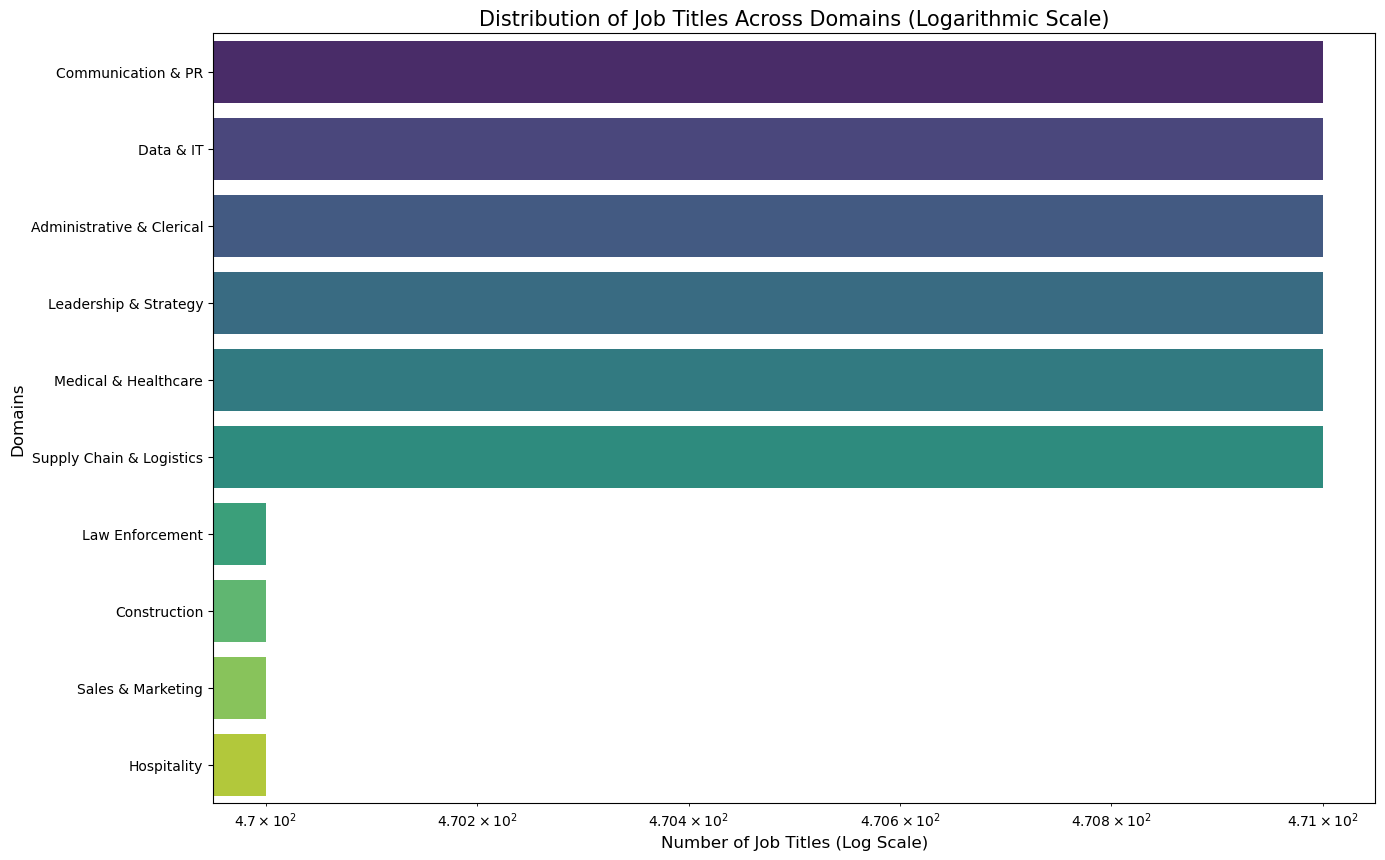

In [20]:
domain_counts = data['Domain'].value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(y=domain_counts.index, x=domain_counts.values, palette="viridis")
plt.xscale('log')
plt.title('Distribution of Job Titles Across Domains (Logarithmic Scale)', fontsize=15)
plt.xlabel('Number of Job Titles (Log Scale)', fontsize=12)
plt.ylabel('Domains', fontsize=12)
plt.show()

• The **"Data & IT"** domain has the highest number of diverse job titles, followed closely by **"Communication & PR"** and **"Administrative & Clerical"**. This suggests that these sectors have a wide variety of roles, which may also mean they have a broader spectrum of tasks and responsibilities.

• On the other hand, domains like **"Scientific & Technical"** and **"Legal & Regulatory"** have fewer job titles in this dataset.

<br>
<br>

Based on the countplot, there are three types of features: Low (L) type with a count of 6,000   machines, Medium (M) type with a count of 2,997 machines, and High (H)   type with a count of 1,003 machines. Since this categorical data has an ordinal     nature, it will be encoded accordingly.
 
 <br>
<br>


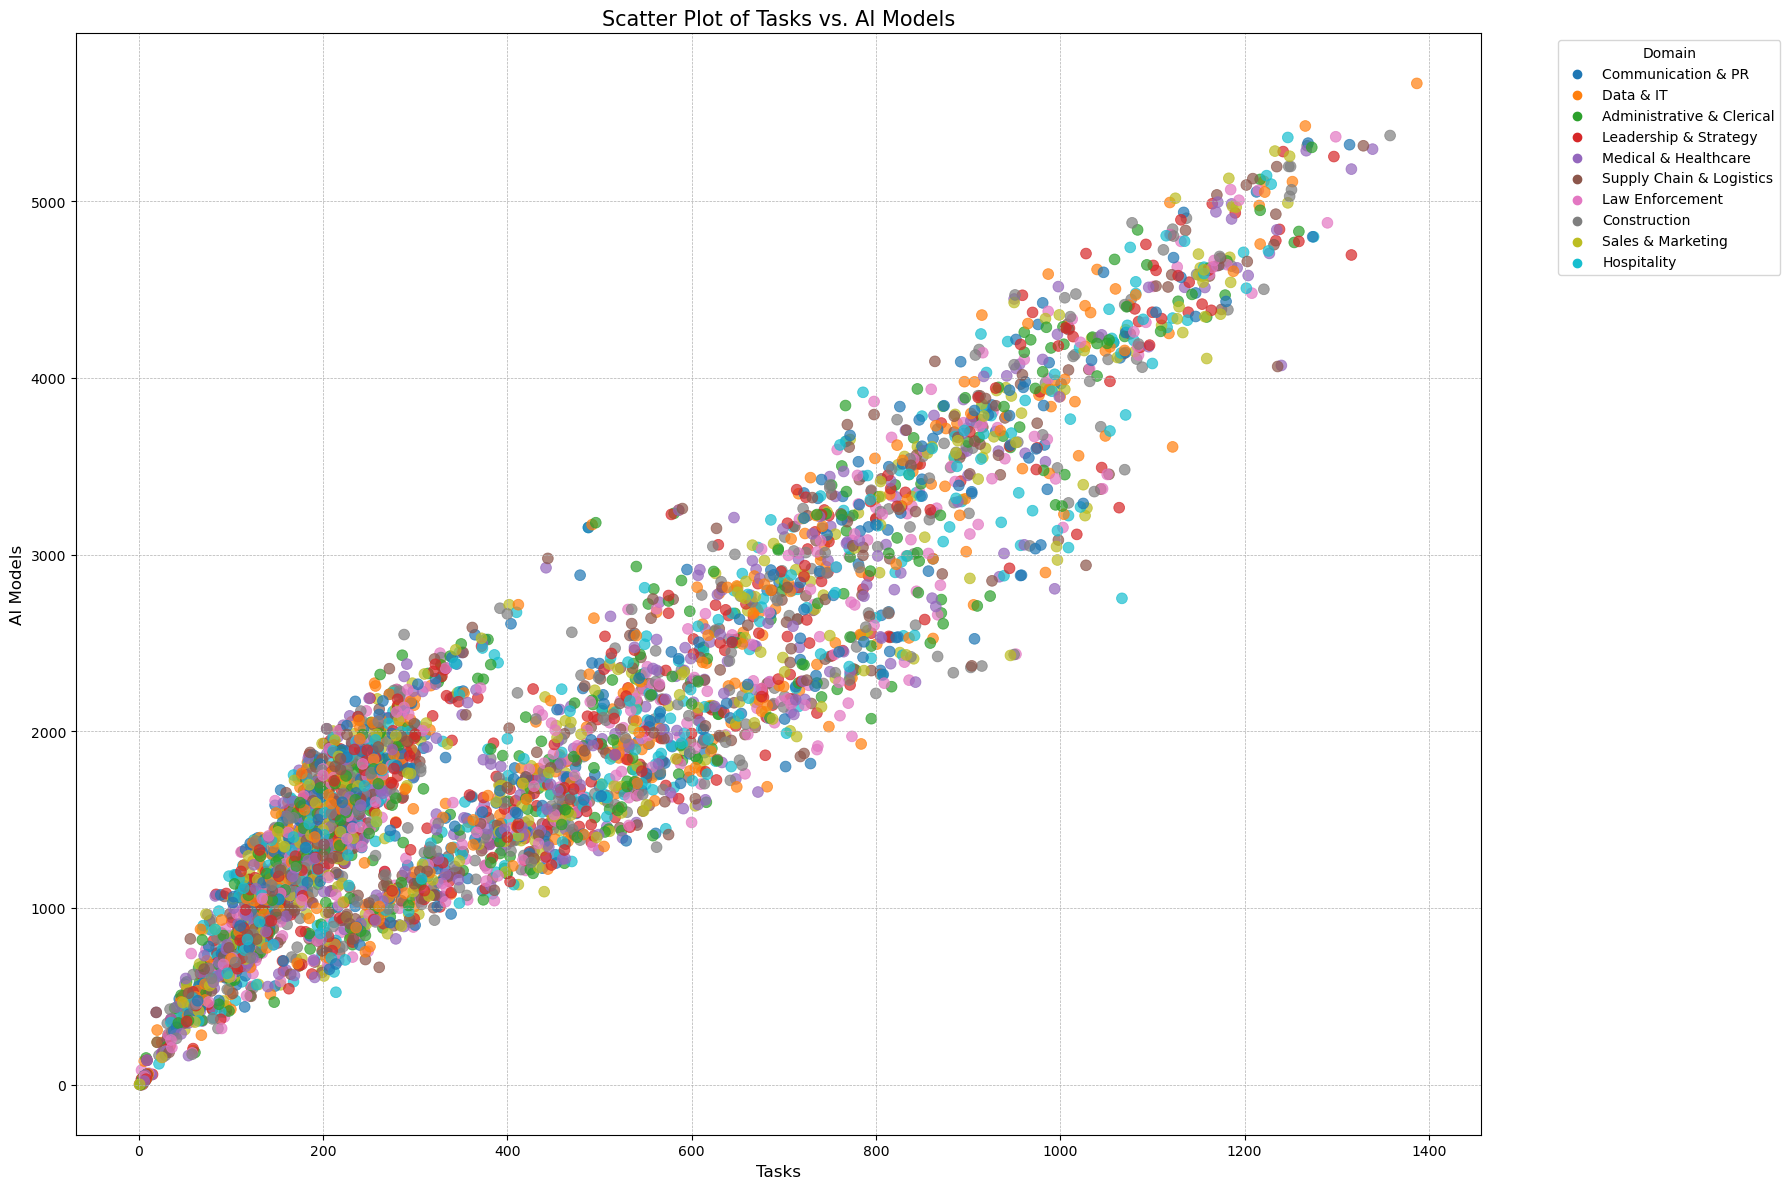

In [21]:
plt.figure(figsize=(18, 12))
sns.scatterplot(data=data, x='Tasks', y='AI models', hue='Domain', palette='tab10', s=60, alpha=0.7, edgecolor=None, marker="o")
plt.title('Scatter Plot of Tasks vs. AI Models', fontsize=15)
plt.xlabel('Tasks', fontsize=12)
plt.ylabel('AI Models', fontsize=12)
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

• There's a visible positive correlation, which aligns with our earlier observation from the correlation matrix. As the number of tasks for a job title increases, the number of associated AI models also tends to increase. 

<br>

• The Domain hue reveals that the **"Data & IT"** domain has many job titles spread across a wide range of tasks and AI models, indicating a diverse set of roles in terms of task complexity and AI involvement.

<br>

• Some domains like **"Legal & Regulatory"** and **"Scientific & Technical"** are more clustered, indicating that the roles within these domains may have a more uniform distribution of tasks and AI models.



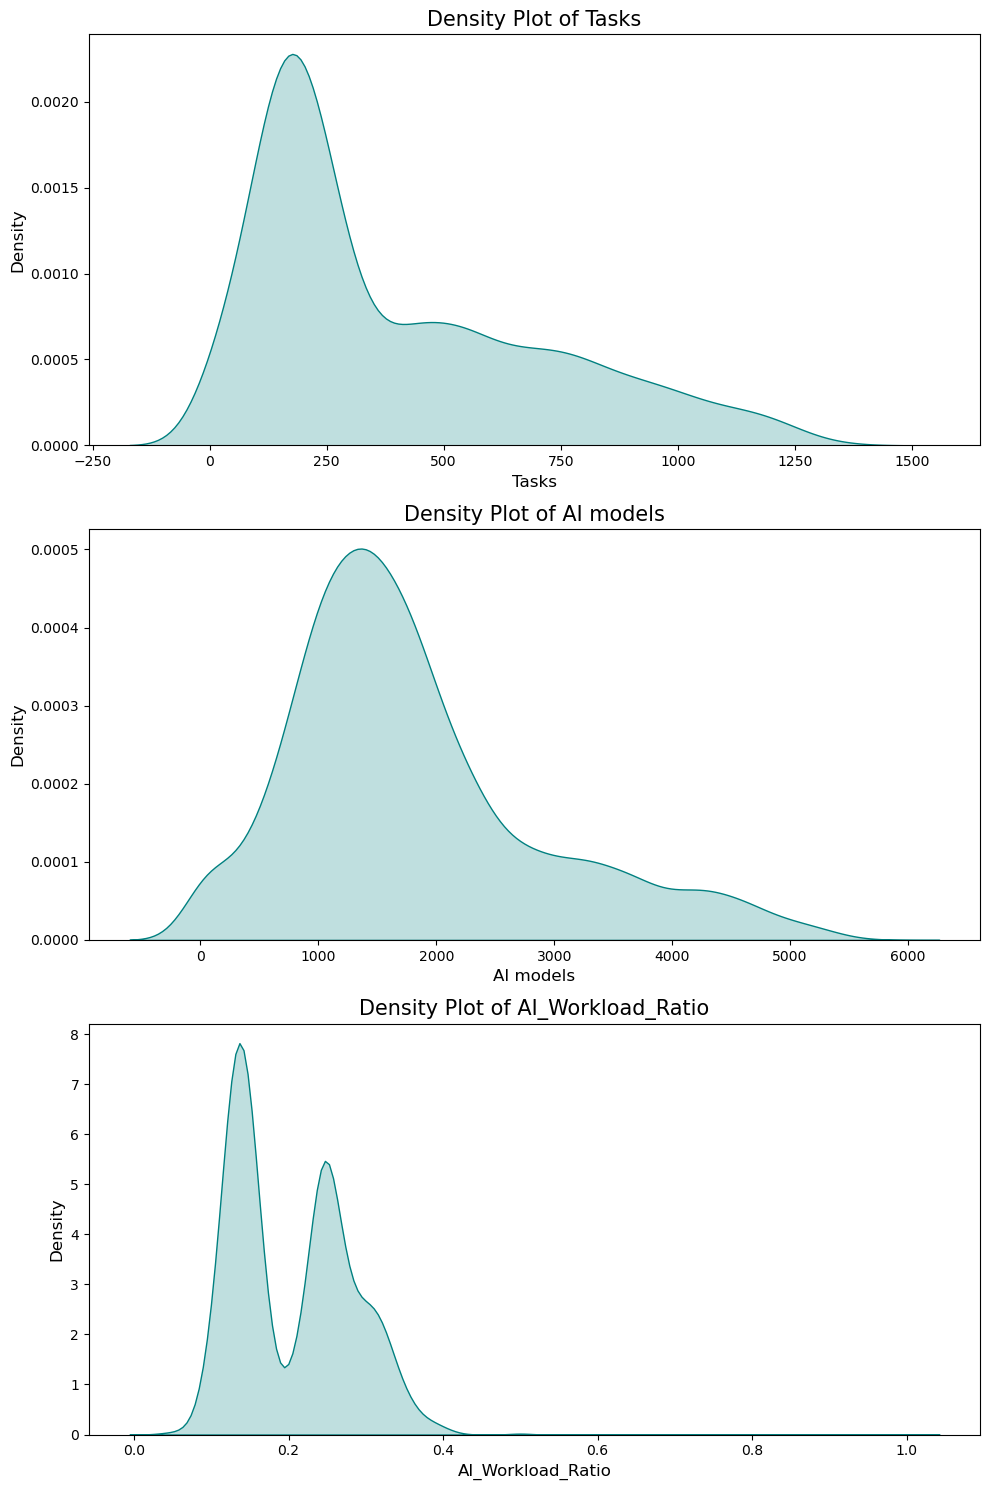

In [22]:
numerical_columns = ['Tasks', 'AI models', 'AI_Workload_Ratio']
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, column in zip(axes, numerical_columns):
    sns.kdeplot(data[column], ax=ax, shade=True, color='teal')
    ax.set_title(f'Density Plot of {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

**Tasks:**  

• Most job titles have fewer tasks, with a peak around **0-100** tasks. The distribution is **positively skewed.**

<br>

**AI Models:**  
 

• The majority of job titles are associated with a lower number of **AI models, showing a peak close to zero**. Like the tasks, this distribution is also **positively skewed.**

<br>

**AI_Workload_Ratio:**  



• Most job titles have an **AI workload ratio close to zero**, but there's another smaller peak around **0.2-0.3**, indicating a **bimodal distribution**. This suggests that while many job titles have a **low AI workload ratio**, a significant number have a ratio around **0.2-0.3**.

<br>
<br>
<br>


# 5. Conclusion  

<br>


The dataset provides insights into the landscape of **job roles** and how they're **influenced by AI**. It's evident that certain domains, like **"Data & IT" and "Communication & PR"**, are at the forefront of **AI integration**, with a higher number of **tasks and AI models** associated with their roles. The **AI impact** varies across domains, indicating that while AI has significant influence in **certain sectors**, others are yet to see its **full potential**.

